***
#### About this document
_This is the assignment for the UCL CASA module Data Science for Spatial Systems (CASA0006) <br>This is a self contained Jupyter notebook with structure introduction, discussion and embeded code and bibliography._
<br>
**Code is hosted [here](https://github.com/HumphreyHZ/CASA0006t)**<br>
**Data is availble [here]()**
***

In [1]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

# 1. Data Loading and Exploration

In [2]:
#read the local csv file as 
smartcity_index = pd.read_csv('Smart_City_index.csv')
smartcity_index.head(20)

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812
5,6,Montreal,Canada,7490,4848,6624,6180,8465,9920,7353
6,7,Vienna,Austria,5683,7608,6232,5415,8580,7500,6771
7,8,Odense,Denmark,6160,8404,7578,5200,6955,7200,6886
8,9,Singapore,Singapore,5790,4344,5560,5535,9695,10000,6813
9,10,Boston,United States,7870,5224,6020,8935,6573,6220,6852


### **variable explanation**
**Smart_Mobility**: 
Index calculated from assessment of city-wide Public Transportation System, ICT, accessibility infrastructure

**Smart_Environment**: 
Index calculated from environmental sustainability impact, monitoring pollution and energy managemen.

**Smart_Government**: Index calculated from comparative study of transparent governance & open data initiatives of smart cities across the world. Also, citizen 
participation in decision making has been included.

**Smart_Economy**: Index calculated through global comparison of city-wide productivity, economic vitality, and support for entrepreneurship and innovation.

**Smart_People**: Index calculated by comparing social and cultural plurality, education systems and its supporting ancillary facilities across the world.

**Smart_Living**: Index calculated by measuring metric around healthcare services, social security and housing quality.

**SmartCity_Index**: Aggregate score for smart city model based on smart city supergroups.et.

In [3]:
smartcity_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 102 non-null    int64 
 1   City               102 non-null    object
 2   Country            102 non-null    object
 3   Smart_Mobility     102 non-null    int64 
 4   Smart_Environment  102 non-null    int64 
 5   Smart_Government   102 non-null    int64 
 6   Smart_Economy      102 non-null    int64 
 7   Smart_People       102 non-null    int64 
 8   Smart_Living       102 non-null    int64 
 9   SmartCity_Index    102 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 8.1+ KB


In [4]:
original_column_names = smartcity_index.columns
print(original_column_names)


Index(['Id', 'City', 'Country', 'Smart_Mobility', 'Smart_Environment',
       'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living',
       'SmartCity_Index'],
      dtype='object')


In [5]:
#rename columns
sci = smartcity_index.rename(columns={
    'Smart_Mobility': 'mobility',
    'Smart_Environment': 'environment',
    'Smart_Government': 'government',
    'Smart_Economy': 'economy',
    'Smart_People': 'people',
    'Smart_Living': 'living',
    'SmartCity_Index': 'index',
})
sci.head(20)

,Id,City,Country,mobility,environment,government,economy,people,living,index
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812
5,6,Montreal,Canada,7490,4848,6624,6180,8465,9920,7353
6,7,Vienna,Austria,5683,7608,6232,5415,8580,7500,6771
7,8,Odense,Denmark,6160,8404,7578,5200,6955,7200,6886
8,9,Singapore,Singapore,5790,4344,5560,5535,9695,10000,6813
9,10,Boston,United States,7870,5224,6020,8935,6573,6220,6852


In [6]:
sci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           102 non-null    int64 
 1   City         102 non-null    object
 2   Country      102 non-null    object
 3   mobility     102 non-null    int64 
 4   environment  102 non-null    int64 
 5   government   102 non-null    int64 
 6   economy      102 non-null    int64 
 7   people       102 non-null    int64 
 8   living       102 non-null    int64 
 9   index        102 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 8.1+ KB


In [7]:
#Summary Statistics
summary = sci.describe().round(2)
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
Id,102.0,51.50,29.59,1.0,26.25,51.5,76.75,102.0
mobility,102.0,5786.11,1202.63,3175.0,4864.75,5724.0,6763.75,8110.0
environment,102.0,5935.93,1722.71,1850.0,4530.50,6491.0,7310.00,8844.0
government,102.0,5916.58,1175.27,2806.0,5143.00,5932.0,6585.00,8726.0
economy,102.0,6114.28,1790.14,1490.0,5007.50,6391.5,7463.75,9225.0
people,102.0,5896.81,1475.25,2825.0,4724.75,5747.5,7072.50,9695.0
living,102.0,6354.86,2274.48,1980.0,4385.00,6334.0,8696.75,10000.0
index,102.0,5928.46,1038.96,-24.0,5344.75,6248.0,6672.50,7353.0


In [8]:
num_cities_by_country = sci.groupby('Country')['City'].count().sort_values(ascending=False)
num_cities_by_country


Country
Italy                   11
Finland                 10
Germany                 10
United States            7
France                   7
Canada                   6
Norway                   4
Australia                4
Denmark                  4
United Kingdom           3
Sweden                   3
China                    3
Russia                   2
United Arab Emirates     2
Switzerland              2
Japan                    2
Spain                    2
South Korea              2
Estonia                  1
Taiwan                   1
Slovenia                 1
Slovakia                 1
Singapore                1
Belgium                  1
Portugal                 1
New Zealand              1
Netherlands              1
Malaysia                 1
Austria                  1
Latvia                   1
Israel                   1
Ireland                  1
Iceland                  1
Hungary                  1
Czech Republic           1
Luxembourg               1
Name: City, dtype: i

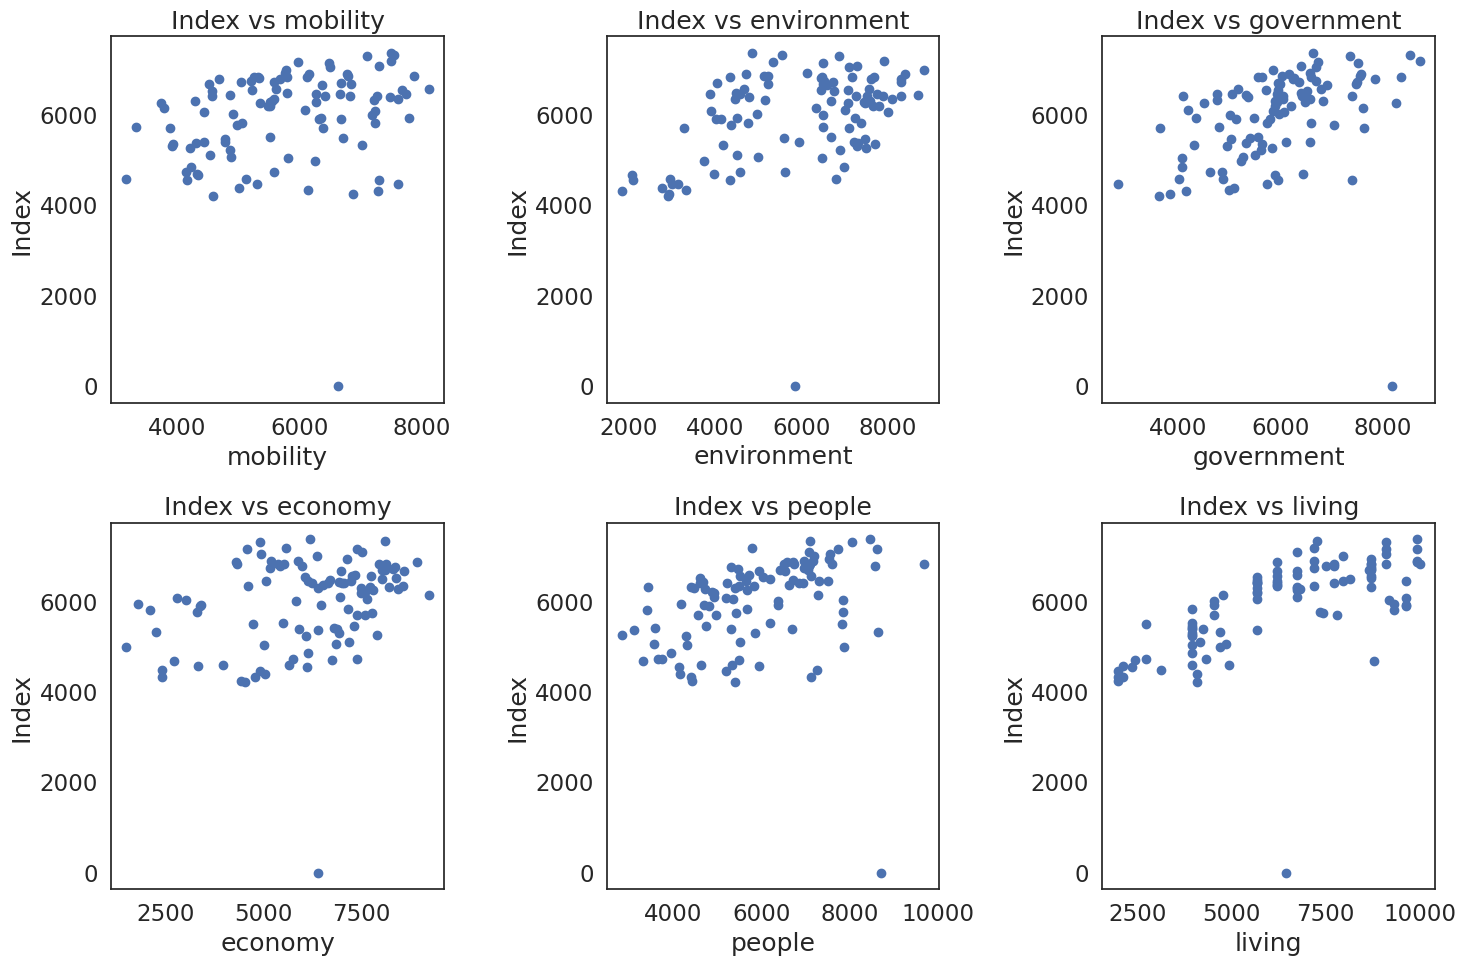

In [9]:
# Selecting the features to plot against the 'index'
features = ['mobility', 'environment', 'government', 'economy', 'people', 'living']

# Creating a figure with 2 rows and 3 columns for the subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the figure size as needed

# Flatten the array of axes to easily iterate over it
axs = axs.ravel()

# Plotting each feature against the 'index'
for i, feature in enumerate(features):
    axs[i].scatter(sci[feature], sci['index'])
    axs[i].set_title(f'Index vs {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Index')

# Adjusting layout to prevent overlapping of plots
plt.tight_layout()
plt.show()

# 2. Linear regression

### Assumptions 
Plotting scatter plots between each of the independent variables and the dependent variable can give us a visual indication of linearity. The points roughly follow a straight line, so this suggests a linear relationship.

But before we run linear regression, we need to check a couple things-- all statistical tests have a number of assumptions that must be satisfied in order to yield robust results. Before we run a regression, we must check that the assumptions in this case are satisfied. There are four main ones:

    A. Indepdendence 
    B. Homoscedasticity
    C. Multicollinearity 

Let's go through them one by one. 

##### A. Independence 

**`Linear regression assumes that measurements for each sample subject are in no way influenced by or related to the measurements of other subjects.`**

Though in the full CPS dataset we have repeat observations of the same individual over time, we've only been analyzing one year's worth of data, so we satisfy the independence assumption. If we ran a regression on the full sample over multiple years, *this would violate the independence assumption*. It's very possible to run a regression with repeat observations of the same units (people, places, etc.) over time, but you need to use a special type of regression called a **panel regression**. More on that next week. 

### B. Homoscedasticity 

**`Linear regression assumes that the variance of residuals is the same for any value of $x$, and that residuals are normally distributed with a mean of 0.`**

This is a complicated way of saying your regression line should fit consistently across the full range of $x$ values. If there are really small residuals (i.e., all the data points are close to the line) for low values of $x$, but larger residuals for high values of $x$, the regression is not performing well-- we wouldn't have the same confidence in our predictions at different values of $x$. Similarly, if all the residuals are on one side of the regression line in different parts of the $x$ range, the model will consistently over/underestimate in those regions. When the variance of residuals from a regression model are inconsistent, we have **`Heteroscedasticity`**. 

We can explore potential heteroscedasticity by visually inspecting a regression plot. In our case, we're primarily interested in the relationship between years of schooling and hourly wages, so we'll be plotting these variables against eachother. `sns.jointplot()` lets us create a plot with four components which can help us diagnose potential heteroscedasticity:



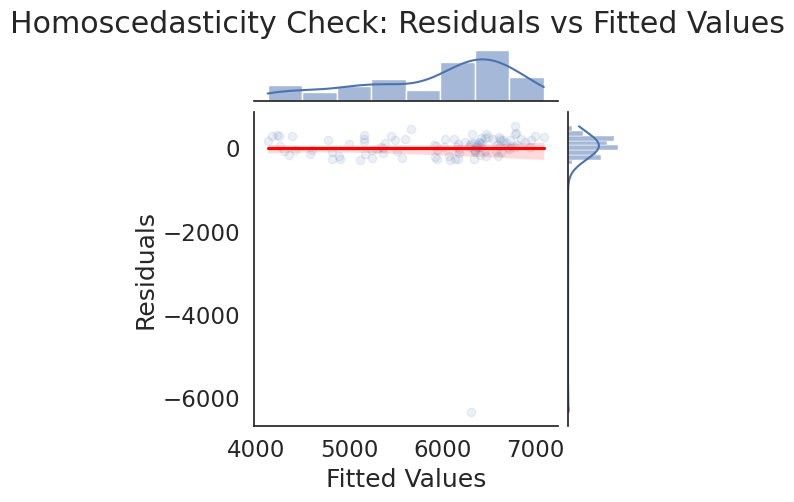

In [10]:
# Assuming 'df' is your DataFrame with the original data
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# Define the regression model
model = ols('index ~ mobility + environment + economy + people + living', data=sci).fit()

# Compute fitted values and residuals
sci['fitted_values'] = model.fittedvalues
sci['residuals'] = model.resid

# Now create the jointplot
sns.jointplot(data=sci, 
               x='fitted_values',  # Fitted values from the regression model
               y='residuals',      # Residuals from the regression model
               kind="reg",         # Regression and scatterplot
               scatter_kws={'alpha': 0.1},  # Transparency of the scatterplot points
               line_kws={'color': 'red'},   # Color of the regression line
               height=5)          # Height of the plot in inches

plt.xlabel('Fitted Values')  # Label for the x-axis
plt.ylabel('Residuals')      # Label for the y-axis
plt.suptitle('Homoscedasticity Check: Residuals vs Fitted Values', y=1.02)  # Title for the plot, adjusted position
plt.show()

## Interpretation

Residuals vs. Fitted Values: The main scatter plot shows the residuals on the y-axis against the fitted values on the x-axis. Homoscedasticity would be indicated by the residuals being evenly spread across all levels of fitted values, without any clear patterns. If the residuals seem randomly dispersed and form a "cloud" around the horizontal axis (y=0), this suggests homoscedasticity.

Red Regression Line: The red line represents a simple regression line of residuals on the fitted values. For perfect homoscedasticity't this li is expected to be flat and close to zero across the range of fitted values. In the provided plot, the line appears relatively flat, which is a good sign; however, the true test of homoscedasticity is more about the spread of the residuals rather than the slope of this line.

Density Plots: On the top and right margins, we have density plots for the fitted values and residuals, respectively. These plots show the distributiontheyour fitted values and residuals. In this case, the density plot of the residuals (right side) should ideally look symmetric around zero and have a constant spread across the levels of fitted values.

Interpretation: In the provided plot, the spread of residuals does not appear to be fanning out or forming a funnel shape as the fitted values increase, which would suggest that the data may be homoscedastic. However, it's important to note that while the plot shows no clear signs of heteroscedasticity, there is a noticeable gap in the fitted values around 5000 and 6000, where fewer data points exist. It's also worth noting that this type of plot does not give a definitive test for homoscedasticity—it provides a visual assessment, which should be supplemented with statistical tests such as the Breusch-Pagan test for a more conclusive analysis.

# Breusch-Pagan test
Given that the plot alone cannot confirm homoscedasticity, I should conduct additional tests and consider looking.


In [11]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming 'df' is a pandas DataFrame with the necessary data

# Fit the model
model = ols('index ~ mobility + environment + government + economy + people + living', data=sci).fit()

# Calculate residuals
residuals = model.resid

# Get predicted values
predictions = model.fittedvalues

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, model.model.exog)

labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': 8.243085720992264, 'p-value': 0.2208297264791172, 'f-value': 1.392062920579004, 'f p-value': 0.22579943807461383}


The p-value is approximately 0.228. Since this p-value is greater than 0.05, we do not have enough evidence to reject the null hypothesis that the variance of the errors is constant. Therefore, we would conclude that there is no significant evidence of heteroscedasticity, and the assumption of homoscedasticity stands based on this test.


### C. Multicollinearity 
**`Multicollinearity emerges when two or more independent variables which are highly correlated are included in a model.`** A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. 

One way of visually exporing multicollinearity is through a correlation matrix:

Text(0.5, 1.0, 'Correlation Matrix')

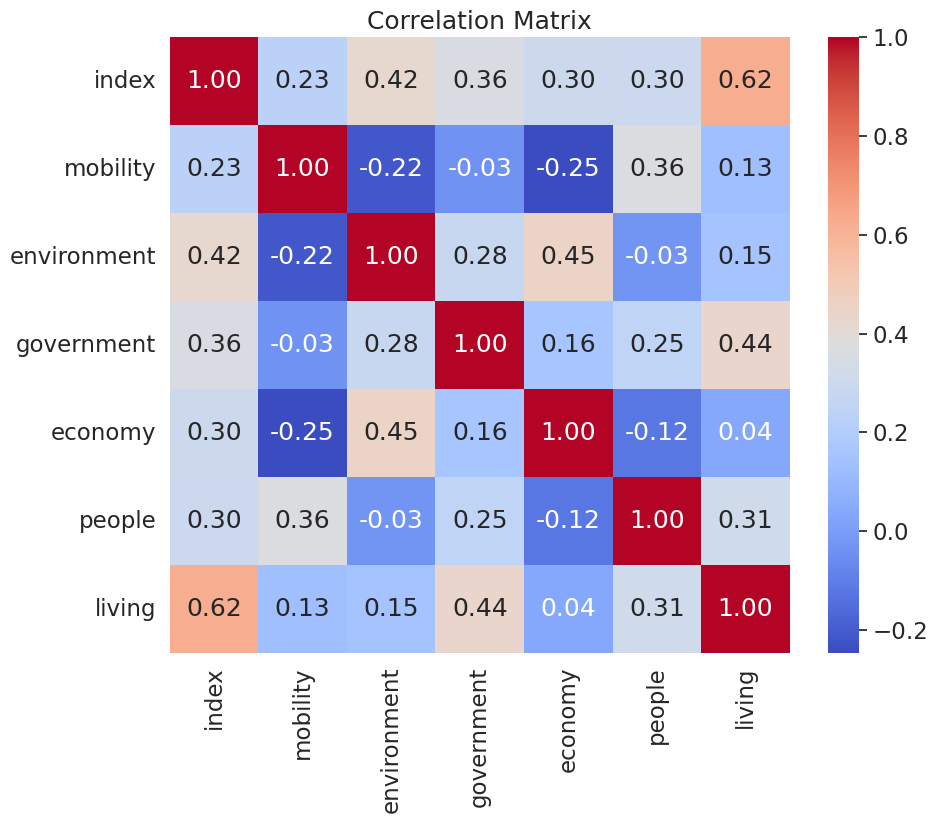

In [12]:
# Select only the columns of interest for the correlation matrix
cols_of_interest = ['index', 'mobility', 'environment', 'government', 'economy', 'people', 'living']
sci_selected = sci[cols_of_interest]


sns.heatmap(sci_selected.corr(numeric_only=True), # plot a correlation matrix 
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Correlation Matrix') # add a title

The variable living is most strongly correlated with the index, which might suggest it has the most substantial impact on the index.
The variables mobility, environment, and economy also show positive correlations with the index, but to a lesser extent.
No variables have a strong negative correlation with the index.
Some variables show weak to moderate correlations with each other, such as economy and environment (0.45). This indicates a moderate positive relationship, but not so high as to be particularly concerning for multicollinearity in a regression model.
The correlation matrix helps in understanding the inter-relationships among the variables and is also useful for detecting multicollinearity before performing regression analysis. Howevhat correlation does not imply causation.

In [13]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [14]:
ind_vars= ['mobility', 'environment', 'government', 'economy', 'people', 'living']

vif = drop_column_using_vif_(sci[ind_vars], thresh=5)
print("The columns remaining after VIF selection are:")
print(vif.columns)

Max VIF: 1.3684423158763055
The columns remaining after VIF selection are:
Index(['mobility', 'environment', 'government', 'economy', 'people', 'living'], dtype='object')


 The maximum VIF value among the independent variables is 1.32, which is well below the common threshold values of 5 or 10 that are typically used as a cutoff to indicate problematic multicollinearity.

Since all of the VIF values are below the threshold, the function has determined that there is no need to drop any columns to mitigate multicollinearity. Therefore, all the independent variables ('mobility', 'environment', 'economy', 'people', and 'living') remain in the model.

## Regression

In [15]:
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

model= ols('index ~ mobility + environment + government + economy + people + living', data=sci).fit() # fit the model
print(model.summary()) # print the summary

                            OLS Regression Results                            
Dep. Variable:                  index   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     23.42
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           8.18e-17
Time:                        01:17:39   Log-Likelihood:                -806.41
No. Observations:                 102   AIC:                             1627.
Df Residuals:                      95   BIC:                             1645.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     967.4807    576.562      1.678      

The OLS regression summary provides a wealth of information about the regression model:

1.Model Fit:

R-squared: At 0.597, this indicates that around 59.7% of the variability in the dependent variable (index) can be explained by the model.
Adj. R-squared: Adjusted for the number of predictors, it is 0.571, suggesting that after accounting for the number of variables in the model, around 57.1% of the variability is explained.

2.Model Significance:

F-statistic: At 23.42, it tests the null hypothesis that all regression coefficients are equal to zero. A large F-statistic suggests at least some predictors are related to the response.
Prob (F-statistic): The p-value for the F-statistic is extremely small (8.18e-17), indicating strong evidence against the null hypothesis. It suggests the model is statistically significant.

3.Coefficients:

Each coef represents the change in the dependent variable for a one-unit change in the predictor, assuming all other predictors are held constant.
Intercept: The expected value of index when all predictors are zero. Its p-value is 0.097, which is marginally above the typical alpha level of 0.05, suggesting that it is not statistically significant.

**mobility**, **environment**, and **living** have p-values less than 0.05, indicating they are statistically significant predictors of index.
government, economy, and people have p-values greater than 0.05, suggesting they are not statistically significant predictors of index at the 5% significance level.

4.Diagnostic for Residuals:

Durbin-Watson: Close to 2, suggesting that there is no strong evidence of autocorrelation in the residuals.
Prob(JB): The Jarque-Bera test p-value is 0.00, which indicates that the residuals do not follow a normal distribution.

5.Condition Number: The condition number is large (1.27e+05), which suggests potential multicollinearity issues or numerical problems. However, the condition number can be sensitive to scaling, so it is not always indicative of a problem. The VIF calculated earlier did not suggest multicollinearity, so it may not be a concern.

Based on these results:

The model fits the data reasonably well.
There are statistically significant predictors in the model.
There is no strong autocorrelation in the residuals, but they do not appear to be normally distributed.
The issue of multicollinearity might not be significant, given the VIF results, but the high condition number warrants further investigation.
Given the non-normality of residuals, further investigation might be needed. This could involve checking for outliers, leveraging transformations, or considering a different modeling approach if the assumptions of OLS are not sufficiently met.

## Cluster

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [17]:
sci


,Id,City,Country,mobility,environment,government,economy,people,living,index,fitted_values,residuals
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,6783.889797,354.110203
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,6999.071726,296.928274
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,6779.445984,531.554016
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,6795.747332,375.252668
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,6470.506787,341.493213
...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712,4883.614840,-171.614840
98,99,Beijing,China,7610,2998,2806,4905,5183,1980,4449,4577.671694,-128.671694
99,100,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191,4349.057268,-158.057268
100,101,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678,6585.965647,92.034353


In [18]:
# Dropping non-numeric columns and the last two columns: 'fitted_values' and 'residuals'
sci_clustering = sci.drop(['Id', 'City', 'Country', 'fitted_values', 'residuals'], axis=1)
sci_clustering

,mobility,environment,government,economy,people,living,index
0,6480,6512,7516,4565,8618,9090,7138
1,7097,6876,7350,4905,8050,9090,7296
2,7540,5558,8528,8095,7098,7280,7311
3,7490,7920,8726,5580,5780,7200,7171
4,6122,7692,8354,4330,6743,7730,6812
...,...,...,...,...,...,...,...
97,4152,4584,4616,7380,3745,4330,4712
98,7610,2998,2806,4905,5183,1980,4449
99,4588,2908,3622,4515,5390,4100,4191
100,6675,4052,5946,8022,6424,8657,6678


In [19]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)


In [20]:
# Normalizing the data
scaler = StandardScaler()
sci_normed = scaler.fit_transform(sci_clustering)

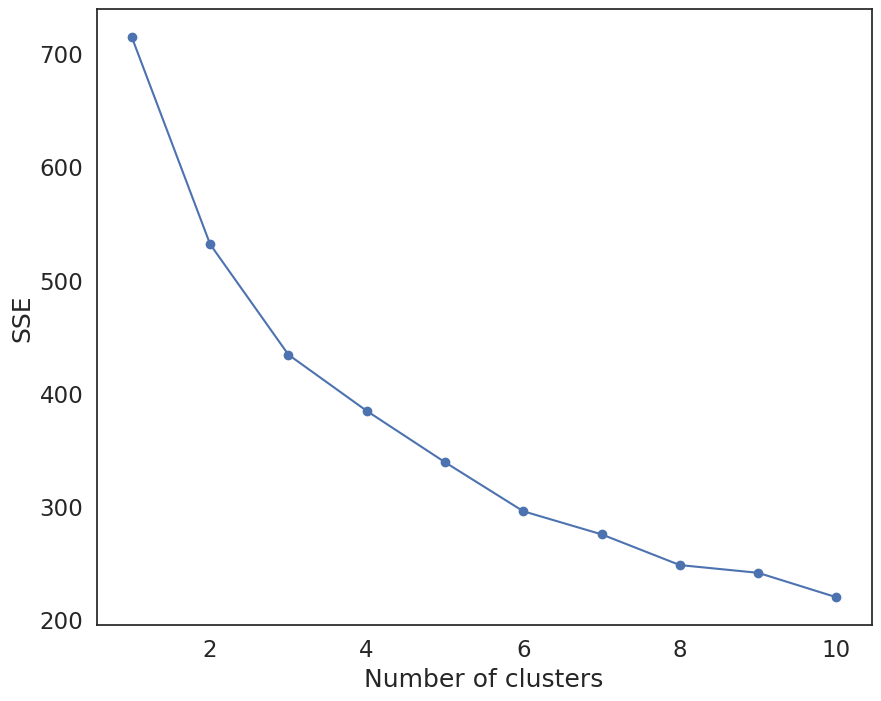

In [21]:
# Performing K-Means clustering and calculating SSE
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(sci_normed)
    list_SSE.append(km.inertia_)

# Plotting the SSE for different numbers of clusters
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [22]:
from kneed import KneeLocator

# Calculate SSE for a range of number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(sci_normed)
    sse.append(kmeans.inertia_)

# Use the kneedle algorithm to find the knee point
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

# The knee (or elbow) point
optimal_k = kl.elbow

print(f"The optimal number of clusters is: {optimal_k}")


The optimal number of clusters is: 3


In [26]:
# Perform K-Means clustering with k=3 as the number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(sci_normed)

# Add the cluster assignments to the original data
sci['cluster'] = clusters

# Display the first few rows to verify the clustering
sci.head(100)

,Id,City,Country,mobility,environment,government,economy,people,living,index,fitted_values,residuals,cluster
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,6783.889797,354.110203,1
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,6999.071726,296.928274,1
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,6779.445984,531.554016,1
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,6795.747332,375.252668,1
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,6470.506787,341.493213,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Naples,Italy,3175,6802,4008,5640,4618,3950,4566,4816.047162,-250.047162,0
96,97,Moscow,Russia,5015,2772,5078,5030,4143,4100,4365,4414.505925,-49.505925,2
97,98,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712,4883.614840,-171.614840,0
98,99,Beijing,China,7610,2998,2806,4905,5183,1980,4449,4577.671694,-128.671694,2


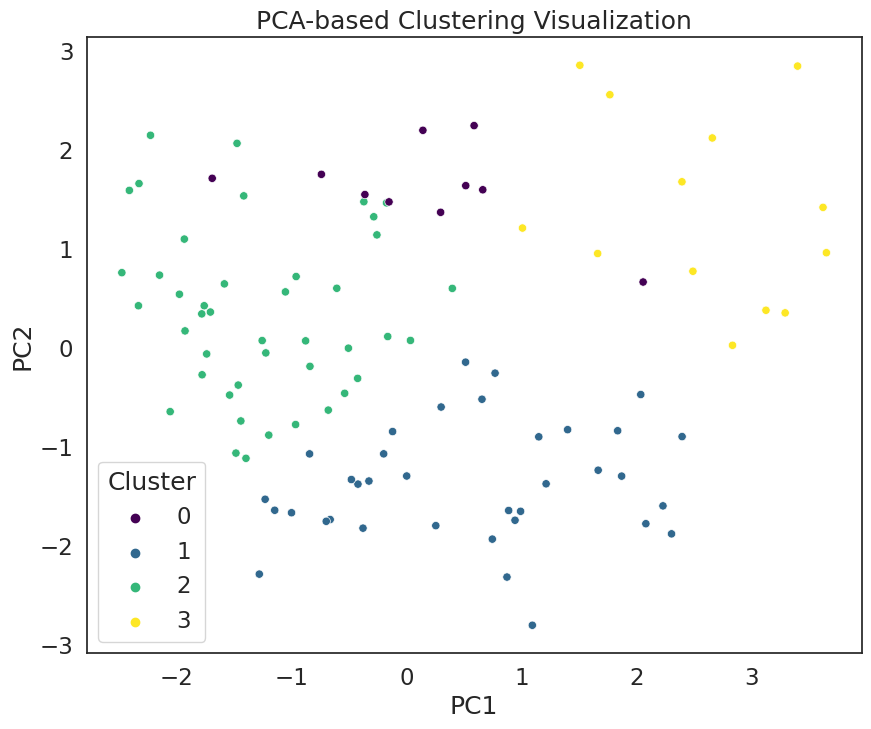

In [24]:
from sklearn.decomposition import PCA
import seaborn as sns
# Apply PCA and reduce the data to two principal components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(sci_normed)

# Create a new DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the cluster labels to this DataFrame
pca_df['Cluster'] = clusters

# Plot the PCA-reduced data with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA-based Clustering Visualization')
plt.show()

Silhouette Score: 0.231098274219471


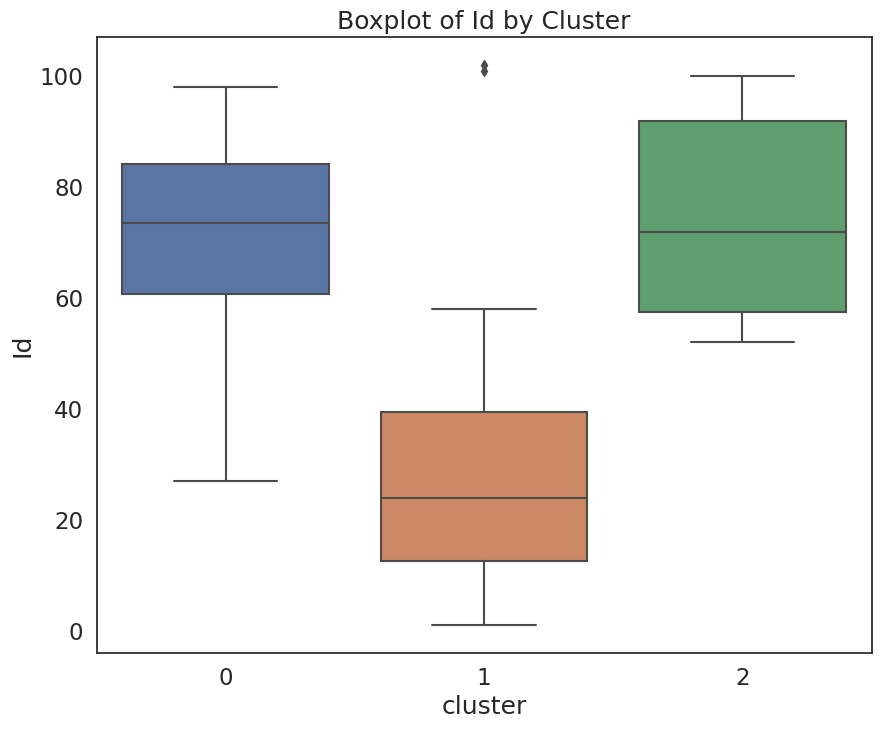

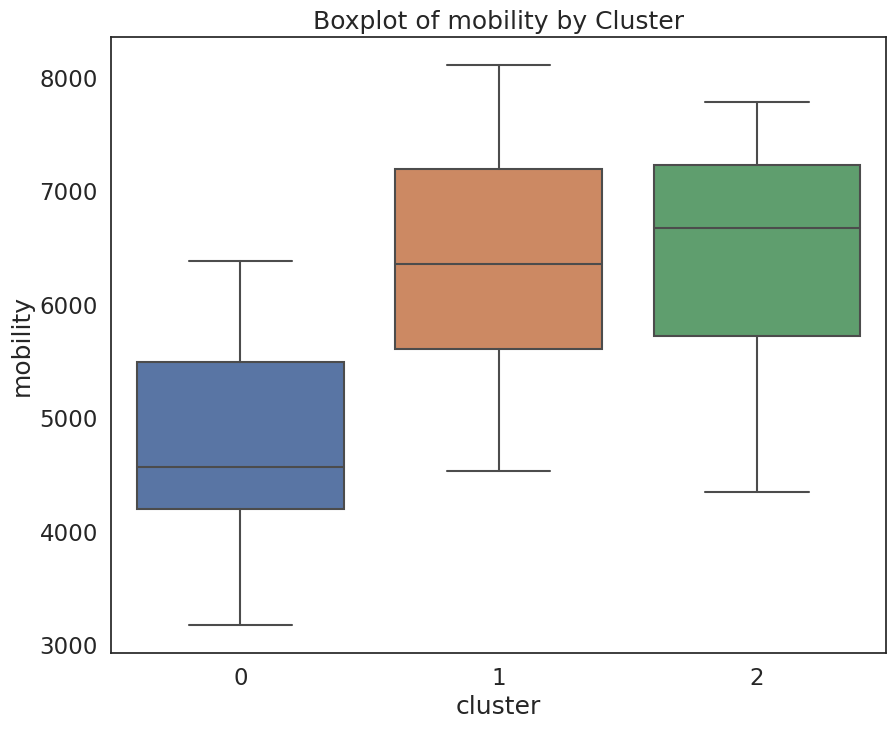

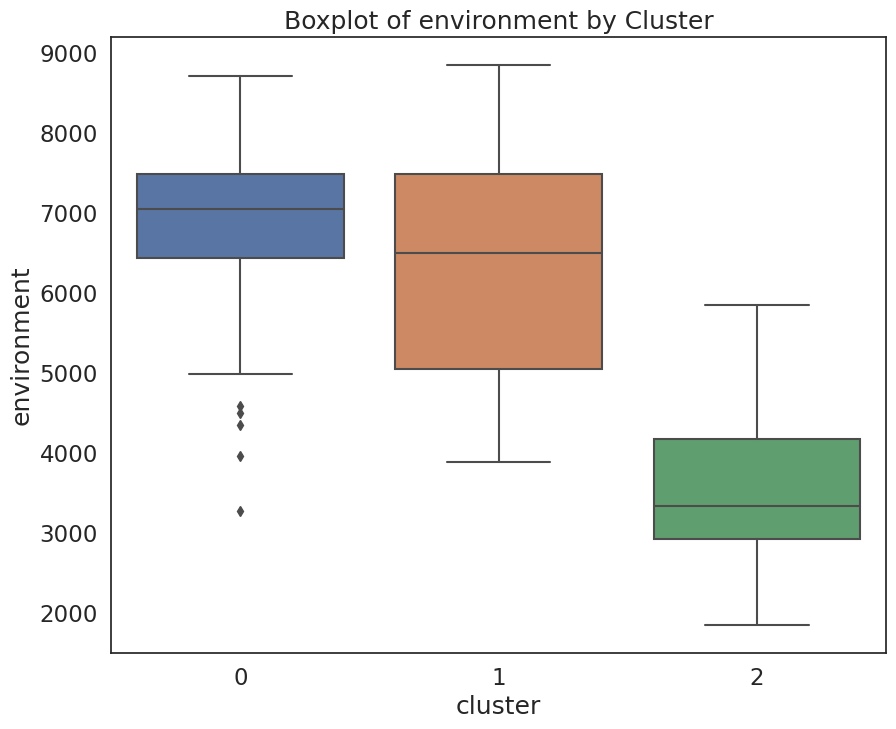

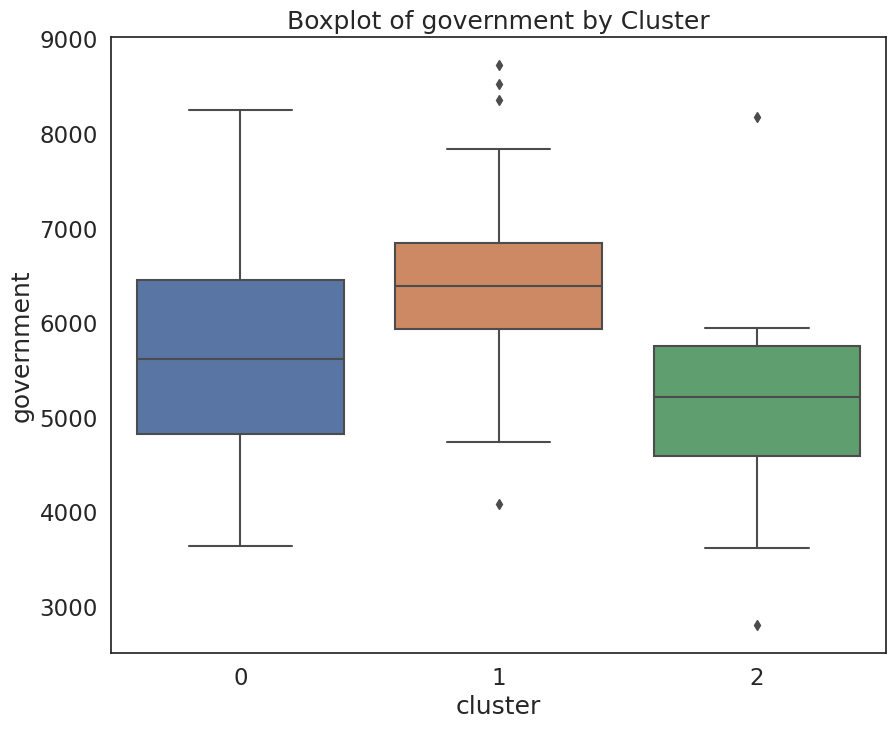

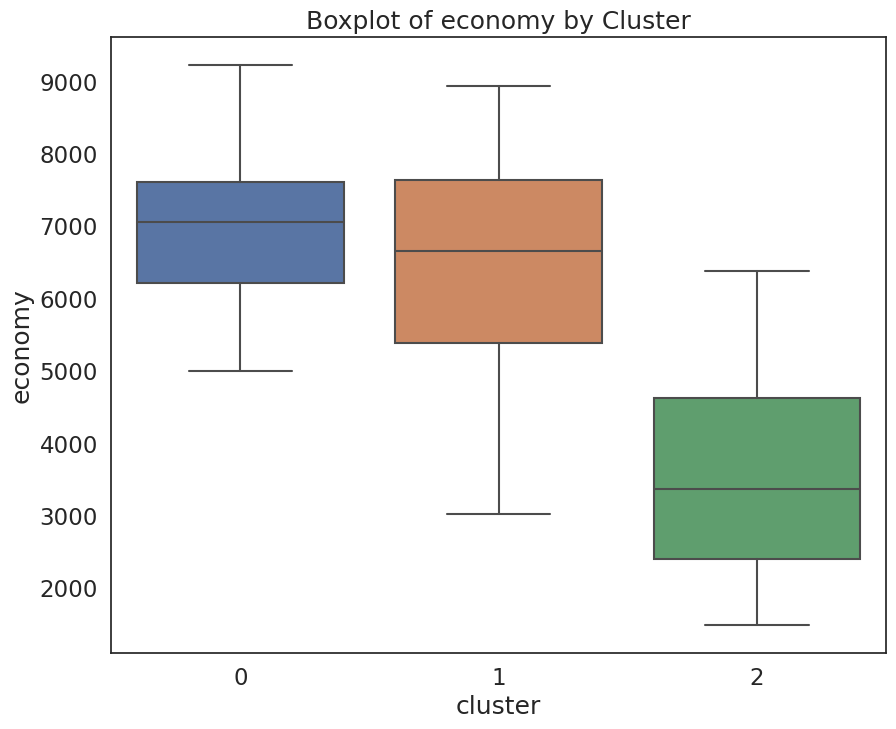

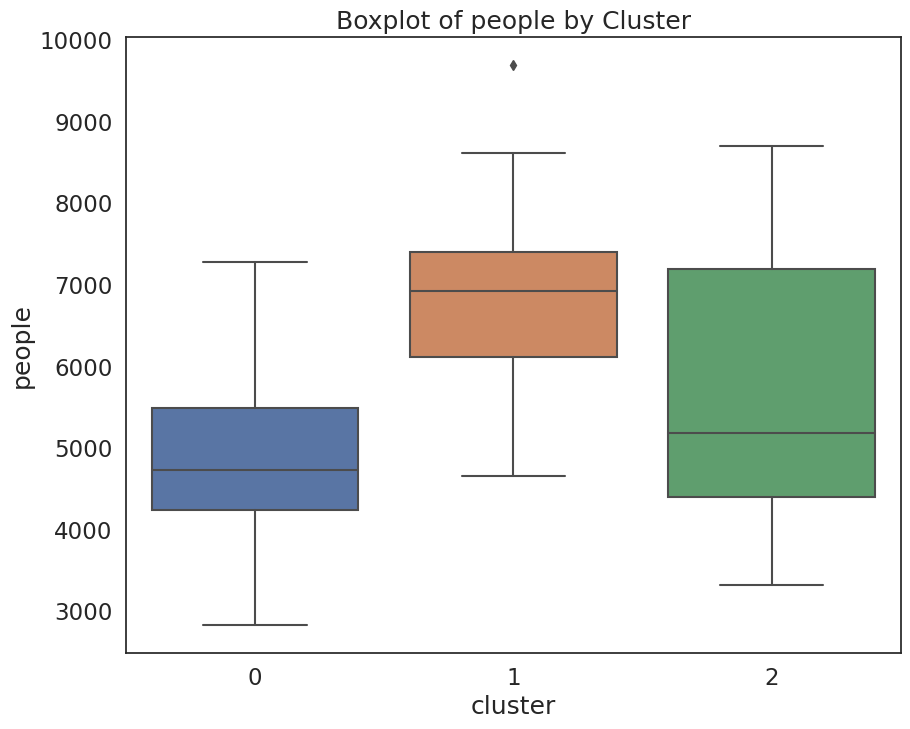

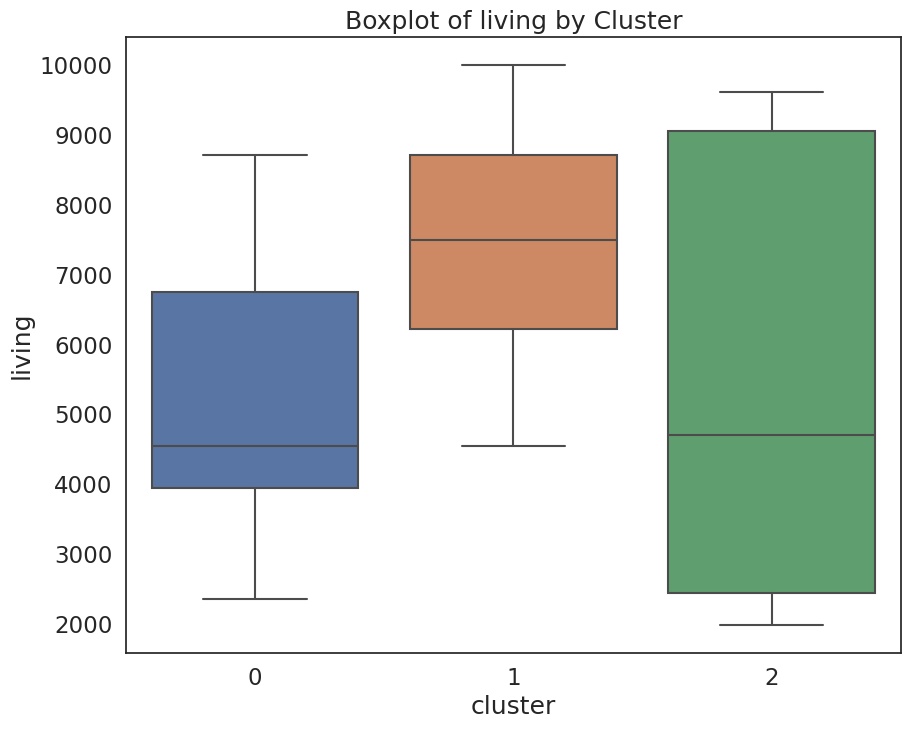

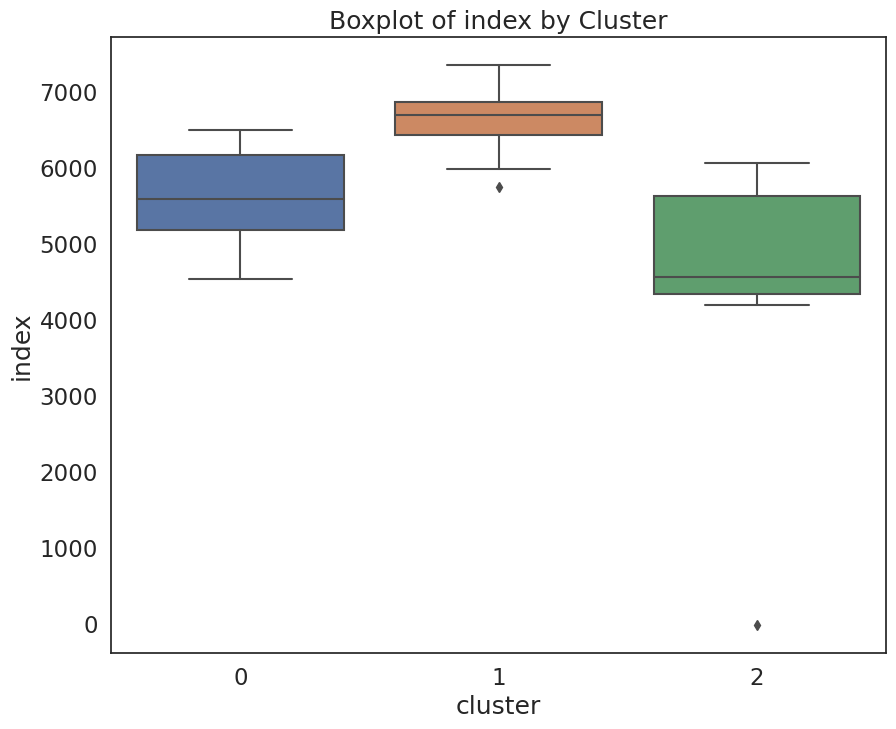

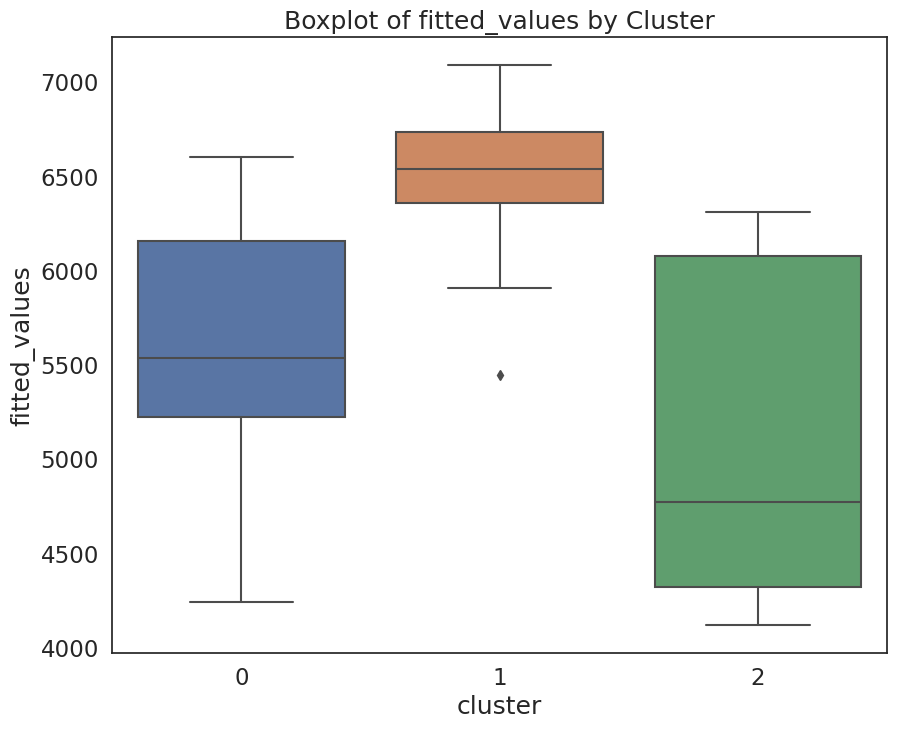

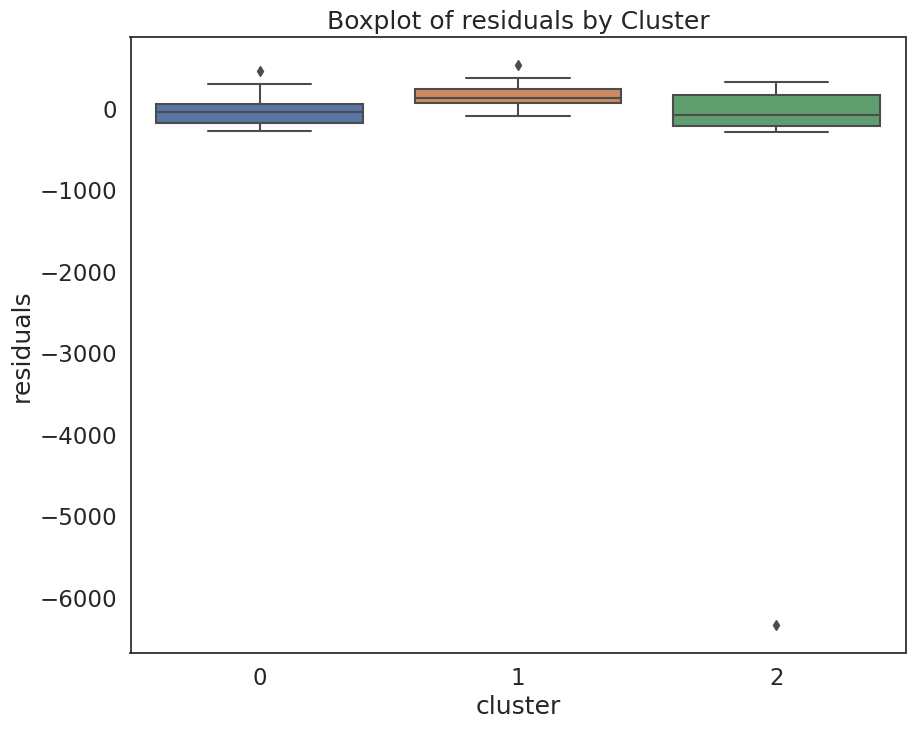

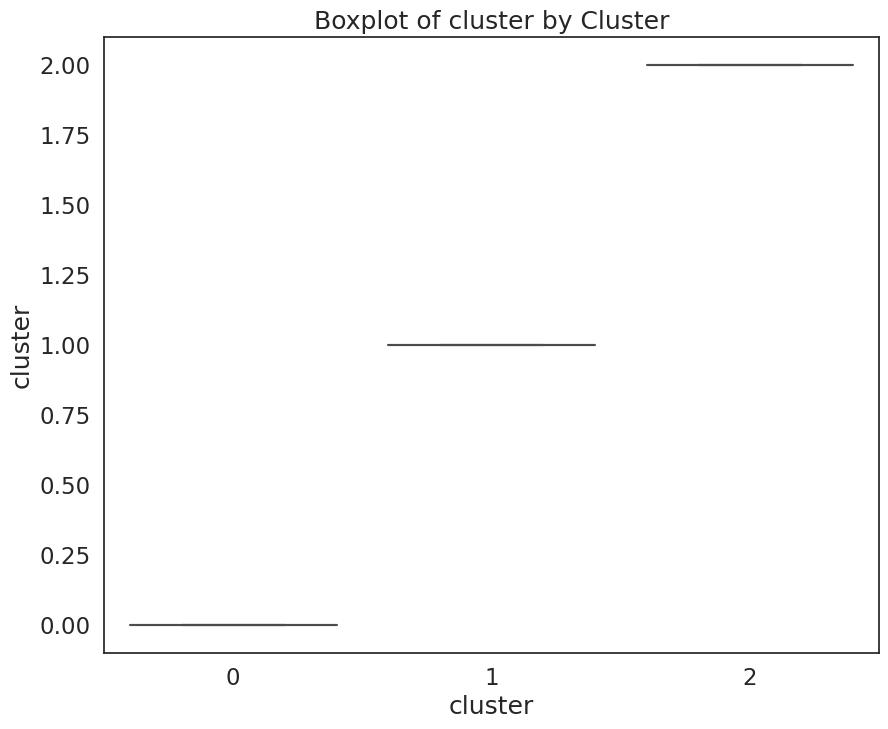

In [29]:
numeric_cols = sci.select_dtypes(include=[np.number]).columns

# Group by the cluster and calculate descriptive statistics for numeric columns only
cluster_stats = sci.groupby('cluster')[numeric_cols].agg(['mean', 'median', 'std'])

# Calculate silhouette score for the clustering
silhouette_avg = silhouette_score(sci_normed, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Now, let's visualize the clustering for each numeric feature
# We will plot boxplots for the numeric columns
for col in numeric_cols:
    sns.boxplot(x='cluster', y=col, data=sci)
    plt.title(f'Boxplot of {col} by Cluster')
    plt.show()